In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
app_dataset = pd.read_csv(r'C:\Users\91936\Desktop\Datasets\Andriod apps\apps.csv', encoding='unicode_escape')
user_review_dataset = pd.read_csv(r'C:\Users\91936\Desktop\Datasets\Andriod apps\user_reviews.csv', encoding='unicode_escape')

In [4]:
df = pd.merge(app_dataset, user_review_dataset, on='App')

In [18]:
df.head(5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,1,Coloring book moana,ART_AND_DESIGN,3.9,967,140.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,140.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,1,Coloring book moana,ART_AND_DESIGN,3.9,967,140.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,1,Coloring book moana,ART_AND_DESIGN,3.9,967,140.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,1,Coloring book moana,ART_AND_DESIGN,3.9,967,140.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61556 entries, 0 to 61555
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              61556 non-null  int64  
 1   App                     61556 non-null  object 
 2   Category                61556 non-null  object 
 3   Rating                  61556 non-null  float64
 4   Reviews                 61556 non-null  int64  
 5   Size                    41150 non-null  float64
 6   Installs                61556 non-null  object 
 7   Type                    61556 non-null  object 
 8   Price                   61556 non-null  object 
 9   Content Rating          61556 non-null  object 
 10  Genres                  61556 non-null  object 
 11  Last Updated            61556 non-null  object 
 12  Current Ver             61556 non-null  object 
 13  Android Ver             61556 non-null  object 
 14  Translated_Review       35929 non-null

In [6]:
# Data Cleaning

In [7]:
df = df.drop_duplicates()


In [8]:
df[['Installs', 'Size', 'Price']] = df[['Installs', 'Size', 'Price']].astype(str)

df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '')
df['Price'] = df['Price'].str.replace('.', '')
df['Price'] = df['Price'].str.replace('$', '')
df['Size'] = df['Size'].str.replace('M', '')
df['Size'] = df['Size'].str.replace('.', '')


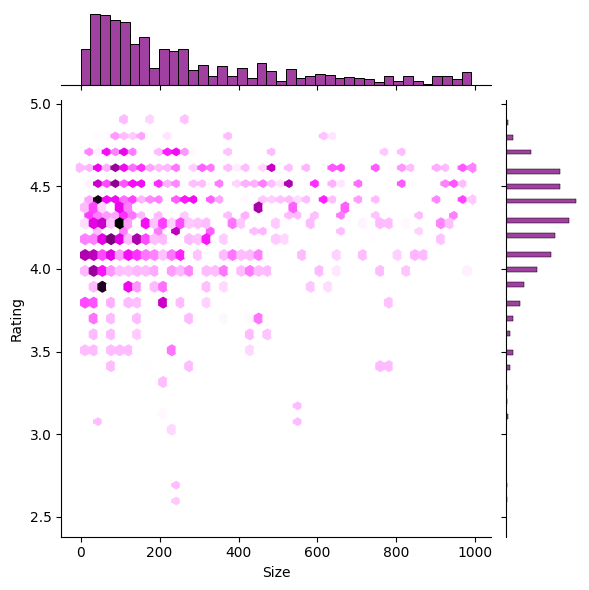

In [17]:
df['Installs'] = pd.to_numeric(df['Installs'],errors='coerce')
df['Size'] = pd.to_numeric(df['Size'],errors='coerce')
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

large_categories = df.groupby(df['Category']).filter(lambda x: len(x) >= 250).reset_index()

plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex', color= 'purple')


<Axes: xlabel='Installs', ylabel='Rating'>

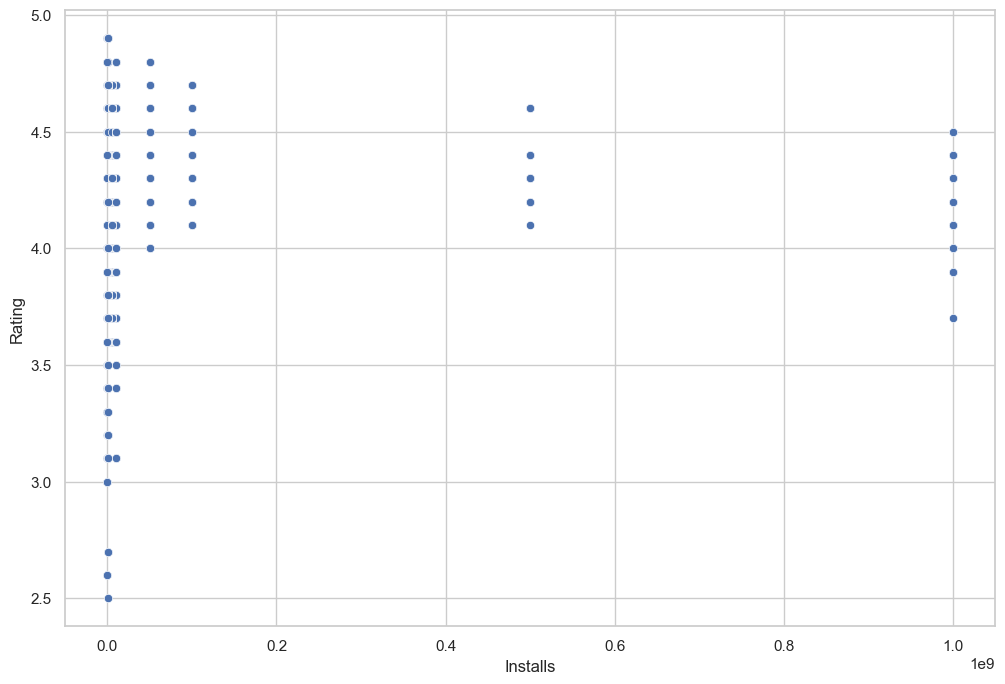

In [22]:
sns.set(style='whitegrid')

sns.scatterplot(x="Installs", y="Rating", data=df)

In [24]:
popular_apps = df.loc[df.groupby('Category')['Installs'].idxmax()]

print(popular_apps[['Category', 'App']])

                  Category                                                App
508         ART_AND_DESIGN  Canva: Poster, banner, card maker & graphic de...
668      AUTO_AND_VEHICLES      Android Auto - Maps, Media, Messaging & Voice
1551                BEAUTY                      Beauty Camera - Selfie Camera
2122   BOOKS_AND_REFERENCE                                  Google Play Books
2794              BUSINESS                    Docs To Goâ¢ Free Office Suite
4434                COMICS                                          DC Comics
4554         COMMUNICATION                       Google Chrome: Fast & Secure
7214                DATING                Hot or Not - Find someone right now
9792             EDUCATION                     Duolingo: Learn Languages Free
11652        ENTERTAINMENT                                  Google Play Games
13872               EVENTS                                              Fever
60736               FAMILY                                      